# traer data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-09 12:44:06.413954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 12:44:06.414001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#bring your data!
path = '/home/lucaspancotto/code/JoacoSoulez/mental_health_first_aid_evaluation/data/twitter_reddit_text.csv'
data = pd.read_csv(f'{path}')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.dropna(inplace=True)
data.head()

,clean_text,label
0,lay bed hour point back pain get work minut cl...,1
1,dlitedaili dont play wouldnt want anyth world,0
2,rewebcoach hey handsom time get day go,0
3,get readi tenni maryyi,0
4,hear song band almost never play favourit radi...,0


In [3]:
print('null values:\n \n',data.isnull().sum())


null values:
 
 clean_text    0
label         0
dtype: int64


## train test split


In [4]:
X = data.clean_text
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.3 )


In [5]:
print('length of X_train',len(X_train), 'length of X_test',len(X_test), 'length of y_train',len(y_train), 'length of y_test',len(y_test))

length of X_train 17750 length of X_test 7608 length of y_train 17750 length of y_test 7608


In [6]:
X_train

21738    rea long period self esteem lowest thought cur...
2756     almost half adult autism struggl depress s tac...
3264                              isacullen yay thanku hug
19529    oh can not wait courteney cox new show cougar ...
13948                                 excit rob thoma back
                               ...                        
15848    sa worker suffer depress s www health medic de...
6319                                        np veckatimest
4573     nathali alon home eat cereal watch videoclip t...
9470     everi night go sleep exact dream happen year a...
10514                               go bed good night folk
Name: clean_text, Length: 17750, dtype: object

## word tokenize and word 2 vec

In [7]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [8]:


X_train = [word_tokenize(str(_)) for _ in X_train]
X_test = [word_tokenize(str(_)) for _ in X_test]



In [9]:


# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5)

In [10]:
word2vec.wv['depress' , 'hello']

array([[ 0.6185211 , -0.4980403 ,  0.51593506, -0.13329145,  1.4337642 ,
        -0.8515912 ,  0.20383611,  0.46031266, -1.5011706 ,  0.73388094,
        -0.20479155,  0.10925493, -1.2244749 ,  0.4905955 ,  0.32720193,
        -0.29199234, -0.6557665 ,  0.10763621,  0.72440755, -1.1992548 ,
        -0.20178477,  0.3801499 , -0.5322313 ,  0.43024614, -0.52608156,
        -0.08701524,  0.3671475 ,  0.73599225, -1.0381328 ,  0.8788391 ,
         1.5920372 , -0.3095948 ,  0.04465646, -1.0292262 ,  0.5261519 ,
         0.8185995 , -0.89924926,  0.54090774,  0.37362787, -1.0940822 ,
        -0.3484779 , -0.28874752, -0.28175887,  0.8529528 ,  0.733508  ,
         0.7996774 , -0.991818  ,  1.0086513 ,  0.44767347,  0.02065887,
        -0.5490725 ,  1.2252142 ,  0.33787432, -1.0847461 , -0.30515093,
         0.04646997, -0.4265852 , -1.3548826 ,  0.89414966, -0.46764937,
        -0.28307727, -0.13190533, -0.0401476 ,  0.1502104 , -0.44518957,
        -0.24143933,  1.4508879 ,  0.9057299 , -0.5

# data embedding

## embed data

In [11]:
def embed_sentence(word2vec, sentence):
    # $CHALLENGIFY_BEGIN
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [12]:
def embedding(word2vec, sentences):
    # $CHALLENGIFY_BEGIN
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed
    # $CHALLENGIFY_END
    
X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)

## pad data

In [13]:
'''X_train_pad = pad_sequences(X_train, dtype='float', padding='post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post')'''

"X_train_pad = pad_sequences(X_train, dtype='float', padding='post')\nX_test_pad = pad_sequences(X_test, dtype='float', padding='post')"

In [14]:
print('number of train texts: ' ,len(X_train))
X_train[3].shape[0]

number of train texts:  17750


10

In [15]:
text_word_lengths = [X_train[i].shape[0] for i in np.arange(len(X_train))]
text_word_lengths_test = [X_test[i].shape[0] for i in np.arange(len(X_test))]

<AxesSubplot:title={'center':'test data lengths'}, ylabel='Count'>

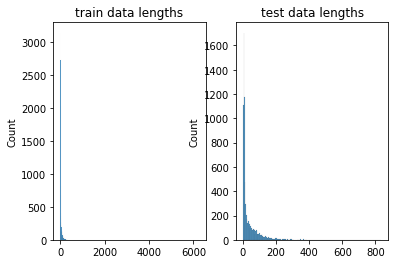

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.title('train data lengths')
sns.histplot(text_word_lengths)
plt.subplot(1,2,2)
plt.title('test data lengths')
sns.histplot(text_word_lengths_test)

In [17]:
text_word_lengths = np.array(text_word_lengths) 

In [18]:
text_word_lengths_df =pd.Series(text_word_lengths).sort_values()

In [19]:
text_word_lengths_df.sort_values(ascending=False).head(30)

14968    6240
12690    1192
87       1124
11930    1086
17145    1045
10873    1010
7483      985
15817     915
11206     824
13638     808
12426     801
13674     786
6478      724
9431      715
14407     675
12410     660
4831      650
11340     645
12541     631
3064      613
1263      612
12838     598
3235      586
15526     580
5700      576
7507      570
11580     566
15091     561
9183      550
10343     547
dtype: int64

In [20]:
#cortamos en 400 words

X_train_pad = pad_sequences(X_train, dtype='float', padding='post', maxlen= 400,truncating= 'post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post', maxlen = 400 , truncating = 'post')


# the model

## baseline score

In [21]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 8888, 1: 8862}
Baseline accuracy:  0.4982912723449001


## first neural network

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy', 'AUC','Precision','Recall'])
    
    return model

model = init_model()

2022-03-09 12:44:23.437730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-09 12:44:23.437781: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-09 12:44:23.437798: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-QMHRL2V): /proc/driver/nvidia/version does not exist
2022-03-09 12:44:23.437999: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train_pad, y_train, 
          batch_size = 32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose = 1
         )

2022-03-09 12:46:32.619482: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1988000000 exceeds 10% of free system memory.


Epoch 1/100
389/389 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9703 - auc: 0.9920 - precision: 0.9770 - recall: 0.9630

2022-03-09 12:51:47.766035: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 852000000 exceeds 10% of free system memory.


389/389 [==============================] - 353s 878ms/step - loss: 0.1129 - accuracy: 0.9703 - auc: 0.9920 - precision: 0.9770 - recall: 0.9630 - val_loss: 0.0729 - val_accuracy: 0.9773 - val_auc: 0.9948 - val_precision: 0.9815 - val_recall: 0.9731
Epoch 2/100
389/389 [==============================] - 105s 270ms/step - loss: 0.0563 - accuracy: 0.9818 - auc: 0.9968 - precision: 0.9872 - recall: 0.9761 - val_loss: 0.0835 - val_accuracy: 0.9762 - val_auc: 0.9947 - val_precision: 0.9969 - val_recall: 0.9555
Epoch 3/100
389/389 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9837 - auc: 0.9972 - precision: 0.9889 - recall: 0.9782

In [ ]:
res = model.evaluate(X_test_pad, y_test, verbose=0)

'''print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')'''